In [1]:
import torch

In [36]:
import os

In [2]:
import matplotlib.pyplot as plt

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
WORKING_DIRECTORY = "/content/drive/MyDrive/Colab Notebooks/CompetiClique"
os.chdir(WORKING_DIRECTORY)

In [3]:
cpu = torch.device('cpu')

dict_keys(['average_game_length', 'max_game_length', 'builder_wins', 'forbidder_wins', 'nobody_wins', 'average_builder_return', 'builder_policy_loss', 'builder_critic_loss', 'average_forbidder_return', 'forbidder_policy_loss', 'forbidder_critic_loss'])


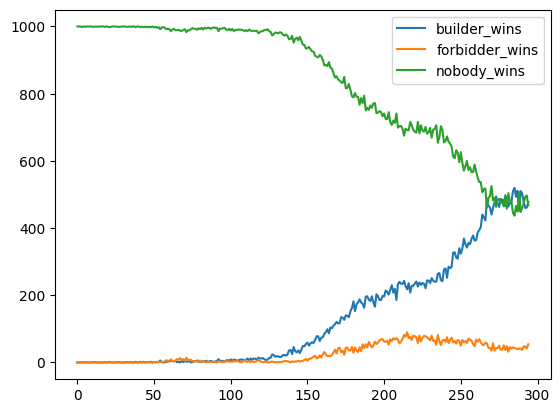

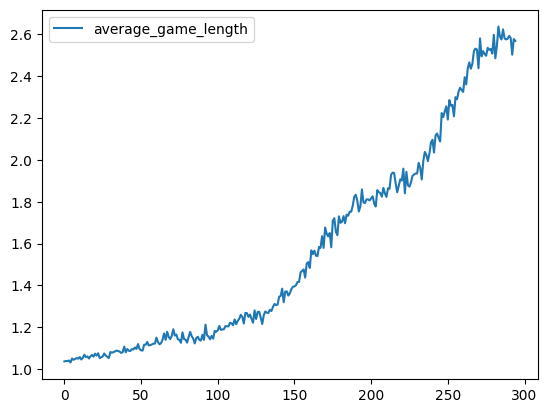

In [5]:
state = {player_name : torch.load(f'models/8_{player_name}_agent.pt', map_location=cpu) for player_name in ['builder', 'forbidder']}
for player, player_state in state.items():
  stats = player_state['agent_training_stats']
  print(stats[0][0].keys())

  num_batches = len(stats)
  train_keys, eval_keys = ['builder_wins', 'forbidder_wins', 'nobody_wins'], ['builder_wins', 'forbidder_wins', 'nobody_wins']

  t_or_e = 0
  keys = train_keys
  for key in keys:
    y = [batch_info[t_or_e][key] for batch_info in stats]
    x = range(num_batches)
    plt.plot(x, y, label=key)
  plt.legend()
  plt.show()

  keys = ['average_game_length']
  for key in keys:
    y = [batch_info[t_or_e][key] for batch_info in stats]
    x = range(num_batches)
    plt.plot(x, y, label=key)
  plt.legend()
  plt.show()

  break